# Introduction to Jupyter Notebooks

## Practical session

In this notebook we are using the R kernel for Jupyter which means we can natively run R code.

Please notice you are running this notebook usign Binder ([learn more about Binder](https://mybinder.readthedocs.io/en/latest/)). In a nutshell, Binder is a cloud service which allows you to connect a git repository, build and deploy a customized container/environment based on your requirements (i.e. software and packages) thus providing an interactive interface for multiple users (up to 100 simultaneously) to your repo (code and data?). Binder is open source, the public version has many limitations (1-2 GB, finish sessions are ephemeral, and more). People can deploy Binder and the underlying tools (repo2docker, Jupyter Hub, BinderHub) in your own network.


Binder requires specific files which specify what program and version should be installed, what packages and version should be installed, and what environment should be launch. In this notebook-environment the following R packages were installed:

- spatstat
- tidyverse
- shiny
- countrycode
- reshape2
- rmarkdown
- httr
- shinydasboard
- leaflet
- ggforce
- ape
- tidytree
- here
- plotly
- gridExtra
- cowplot
- ggtree
- treeio



Please feel free to use functions from these packages at your will.

Notice that you all will be presented with the original notebook I have prepared. However, as this is an interactive notebook, you can modify the code (add or remove lines, analysis, notes, etc) in your own sessions. These changes are ephemeral, this mean the original notebook hosted in GitHub is not affected.

I have make available three data sets for you to play:

- data1: Toy 3D data from Plotly.


- data2: Pete's data from his session on making trees using *ggtree*.


- data3: César's data with intertidal crab burrows position and raster image containing geometries from sediment quadrat.


# Example 1:

3D data from volcano and Cesar's Structure from motion (photogrammetry) reconstructions of the sediment.


In [2]:
library(plotly)
# volcano is a numeric matrix that ships with R
fig <- plot_ly(z = ~volcano)
fig <- fig %>% add_surface()

fig

HTML widgets cannot be represented in plain text (need html)

## Example 2:

The code below comes from Pete's [repo](https://github.com/PeteCowman/ggtree_demo).

In [ ]:
# Lets have fun with a tree
# load libraries
library(broom)
library(tidyr)
# library(tidyverse)
library(ape)
library(ggtree)
library(treeio)
library(tidytree)

In [ ]:
# read in a BEAST format tree (the one in exmaple folder)
tr <- read.beast("https://raw.githubusercontent.com/PeteCowman/ggtree_demo/master/example_data/Chaetodontidae.tre")
tr@phylo
tr@data %>% glimpse()

# plot with ape to get a few node numbers

plot(tr@phylo, cex = 0.3)
nodelabels()

# plot with ggtree
ggtree(tr, ladderize = T, right = T)
ggtree(tr, layout = "circular")
ggtree(tr, layout = "fan")
ggtree(tr, layout = "slanted")
ggtree(tr, layout = "radial")

# since it is calibrated to time I will reverse the node ages to be time before present
p <- ggtree(tr)
p + theme_tree2()

p1 <- revts(p)
p1 + theme_tree2()
# now lets sort outt he tip labels
p1 + geom_tiplab()

# need to add space for labels
p1 + geom_tiplab(size = 2) + xlim(NA,30)

# we can also change the labels to be displayed to save some space.
tr@phylo$tip.label <- gsub("_", " ", tr@phylo$tip.label)

p1 + geom_tiplab(size = 2, fontface = "italic") + xlim(NA,30)

tibble(label = tr@phylo$tip.label) %>% mutate(newlabel = gsub("Chaetodon ", "C. ", label)) %>% arrange(label) -> d
d %>% data.frame(d)

p1 %<+% d + geom_tiplab(aes(label = newlabel), size = 2, fontface = "italic") + xlim(NA,30) -> p2


# lets label some clades

getMRCA(tr@phylo, tip = grep("Chaetodon", tr@phylo$tip.label, value = T))

p2 + geom_nodelab(aes(label = node), geom = "label")
# 112, 136, 205, 182, 165, 141
p2 + 
  geom_cladelabel(node = 112, label  = "Bannerfishes",offset = 20, offset.text = 1, color='black', barsize = 2) + 
  geom_cladelabel(node = 136, label  = "Prognathodes", offset = 20,offset.text = 1, color='grey', barsize = 2) + 
  geom_cladelabel(node = 205, label  = "Clade 1", offset = 20,offset.text = 1, color='black', barsize = 2) + 
  geom_cladelabel(node = 182, label  = "Clade 2", offset = 20,offset.text = 1, color='grey', barsize = 2) + 
  geom_cladelabel(node = 165, label  = "Clade 3", offset = 20,offset.text = 1, color='black', barsize = 2)

# view a clade
viewClade(p2, node = 112)


# plot some data beside the tree
# make some data...didnt finish this...
fish.size <- tibble(label = tr@phylo$tip.label, body.szie = rnorm(length(tr@phylo$tip.label), mean=15, sd=10))

fish.size 

p1

# Example 3:

There are two files available for playing:

1. A data frame containing the position of crabs burrows in a permanent quadrat in the soft intertidal sediment (`data3_points`)

2. A raster image containing the height from a Digital Surface model from a permanent quadrat in the soft intertidal sediment (`data3_raster`)



In [2]:
library(here)
library(plotly)
library(ggplot2)
#library(ggforce)
#library(gridExtra)
library(cowplot)
library(stringr)
library(spatstat)
library(ggforce)

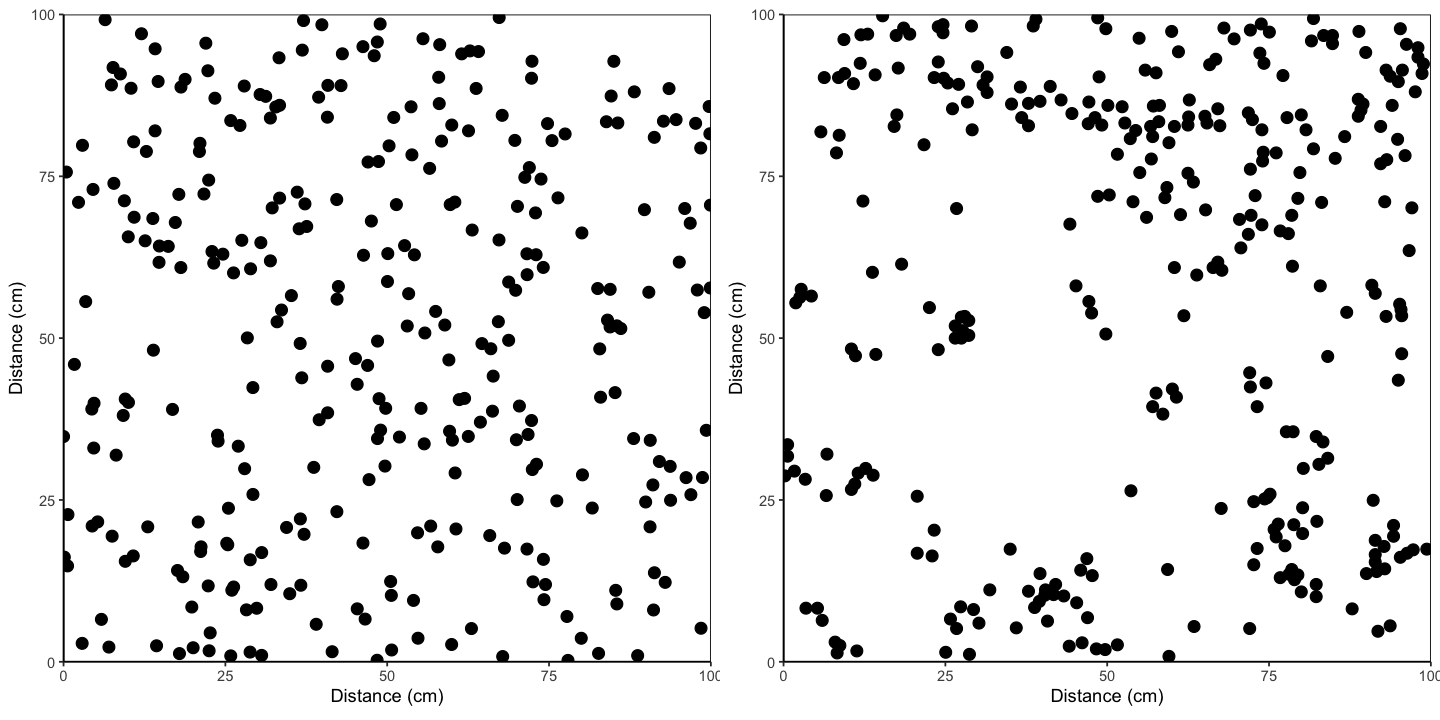

In [5]:
# Compare the crab burrow distribution against a complete random point distribution
options(repr.plot.width=12, repr.plot.height=6)

# Read data
data3_points <-readRDS(file = here("data", "data3_points.RDS"))

# Generate a random point pattern
set.seed(24)
poi_point <- runifpoint(length(data3_points$x))
poi_point <- data.frame(x = poi_point$x*100, y = poi_point$y*100)

# Create plot with simulated data
pa <- ggplot(poi_point, aes(x, y)) +
  geom_point(size = 3) +
  coord_equal(xlim = c(0, 100), ylim = c(0, 100)) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  labs(x = 'Distance (cm)', y = 'Distance (cm)') +
  theme(# plot.margin = margin(5.5, 40, 5.5, 5.5), 
    legend.position = "right",
    panel.border = element_rect(fill = NA),
    panel.background = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.line = element_line(color = "black", size = .5),
    legend.key = element_rect(fill = "white", color = NA))

# Create plot with observed data
pb <- ggplot(data3_points, aes(x, y)) +
  geom_point(size = 3) +
  coord_equal(xlim = c(0, 100), ylim = c(0, 100)) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  labs(x = 'Distance (cm)', y = 'Distance (cm)') +
  theme(# plot.margin = margin(5.5, 40, 5.5, 5.5), 
    legend.position = "right",
    panel.border = element_rect(fill = NA),
    panel.background = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.line = element_line(color = "black", size = .5),
    legend.key = element_rect(fill = "white", color = NA))

## Combine plots
plot_grid(pa, pb)

The data below is a raster that represents the height from a Digital Surface Model (DSM) of the sediment created using Structure from Motion. The DSM looks like the image below.

!["DSM sediment"](images/wireframe.png)

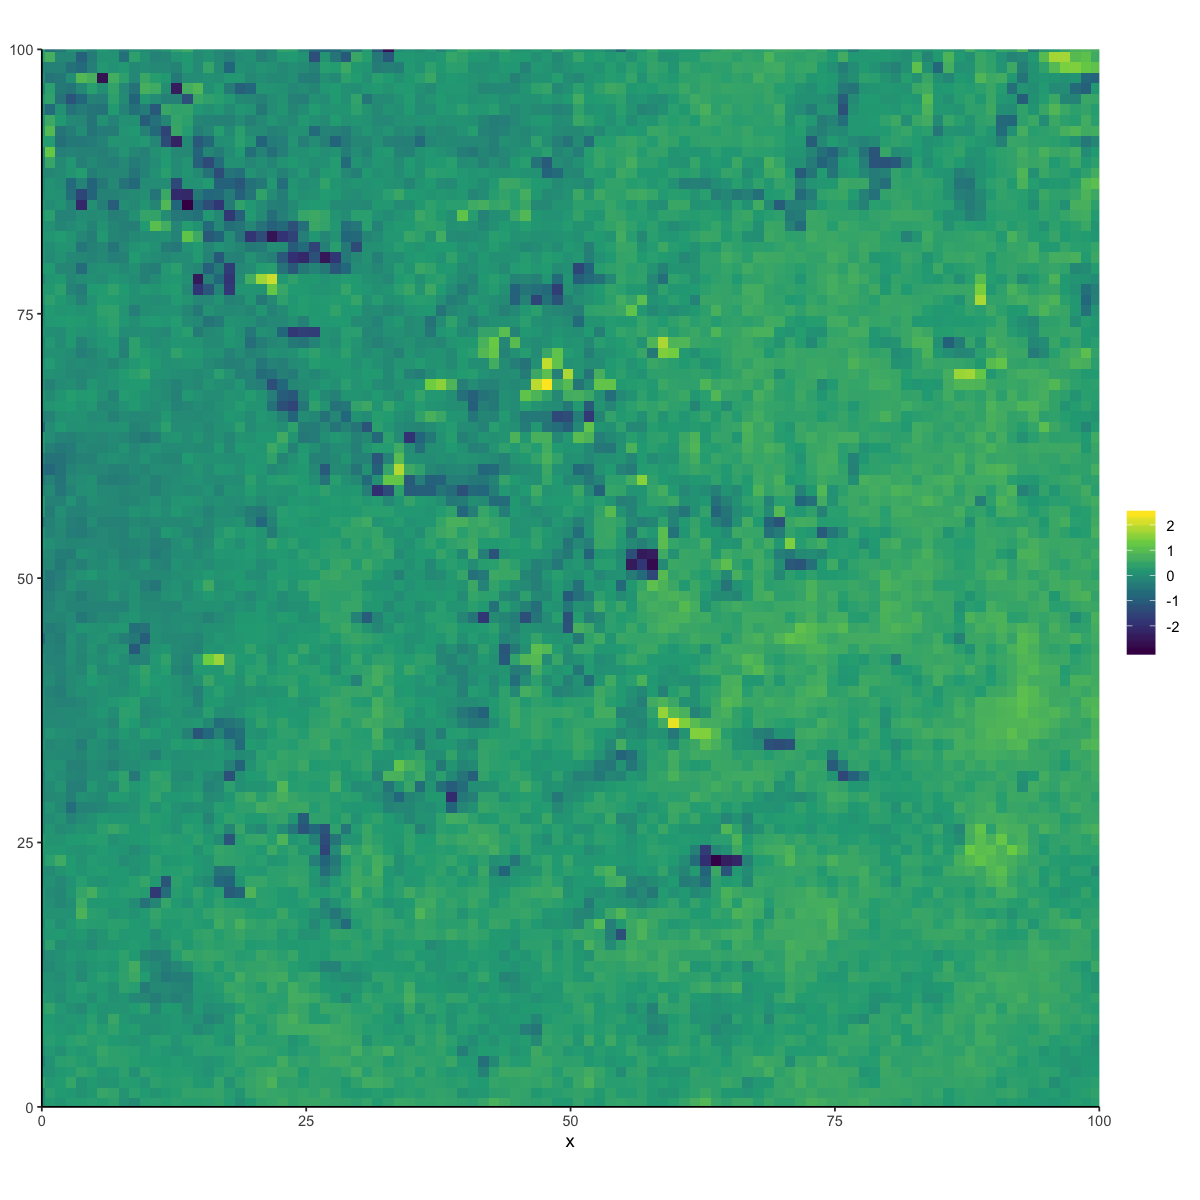

In [7]:
options(repr.plot.width=10, repr.plot.height=10)

data3_raster <- readRDS(file = here("data", "data3_raster.RDS"))

ggplot(data3_raster, aes(x, y, fill=height)) +
  geom_tile() +
  scale_fill_viridis_c(name = "Height (cm)") +
  coord_equal(xlim = c(0, 100), ylim = c(0, 100)) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  theme(# plot.margin = margin(5.5, 40, 5.5, 5.5), 
    legend.position = "right",
    #     legend.key.size = unit(0.8, "cm"),
    legend.title = element_blank(),
    axis.title.y = element_blank(),
    # legend.justification = c("right", "top"),
    panel.background = element_blank(),
    axis.line = element_line(color = "black", size = .5),
    panel.grid.major = element_line(color = "gray", size = 0.25),
    legend.key = element_rect(fill = "white", color = NA))

Let's explore the position of the crab's burrow on top of the raster image.

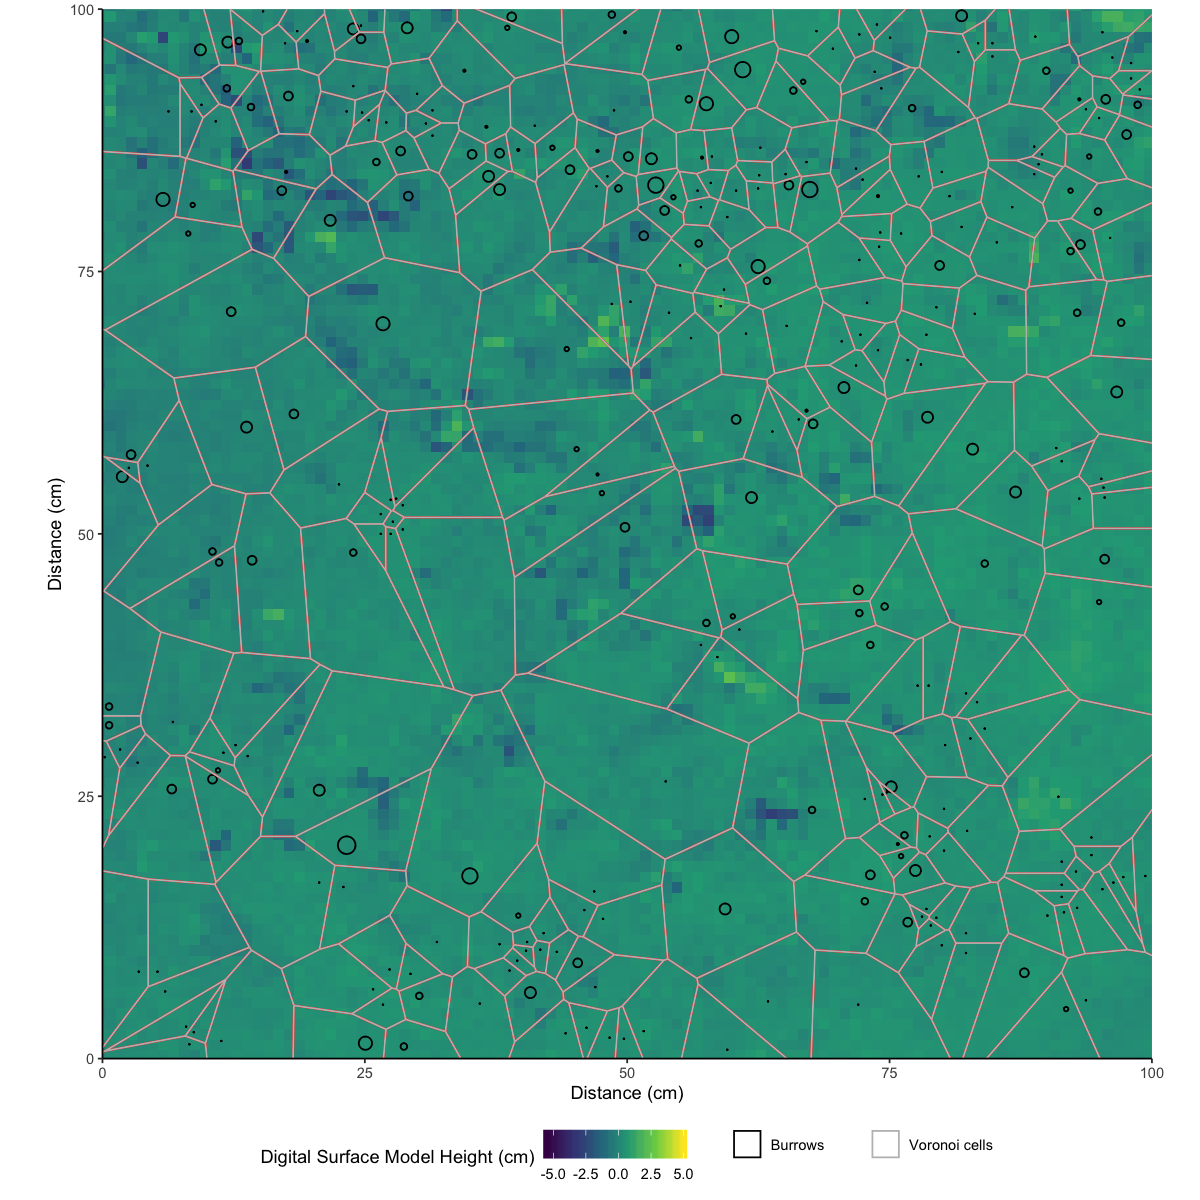

In [36]:
p_bv <- ggplot(data3_points) +
  geom_tile(data=data3_raster, aes(x, y, fill=height)) +
  scale_fill_viridis_c(name ="Digital Surface Model Height (cm)",
                       limits = c(-5.5, 5)) +
  geom_circle(aes(x0 = x, y0 = y, r = Radius, colour = "black")) +
  scale_color_identity(name = "", labels = c("Burrows"), guide = "legend") +
  geom_voronoi_tile(aes(x, y, alpha = 0), colour="red") +
  scale_alpha_identity(name = "", labels = c("Voronoi cells"), guide = "legend") +
  geom_voronoi_segment(aes(x, y), colour="gray") +
  coord_equal(xlim = c(0, 100), ylim = c(0, 100)) +
  scale_x_continuous(expand = c(0, 0)) + 
  scale_y_continuous(expand = c(0, 0)) +
  labs(x = 'Distance (cm)', y = 'Distance (cm)') +
  theme(
    legend.position = "bottom",
    panel.background = element_blank(),
    axis.line = element_line(color = "black", size = .5),
    panel.grid.major = element_line(color = "gray", size = 0.25),
    legend.key = element_rect(fill = "white", color = NA))

p_bv <- p_bv + guides(fill = guide_colorbar(order = 1), 
                      color = guide_legend(order = 2), 
                      alpha = guide_legend(order = 3, override.aes = list(alpha = 1, colour ="gray", fill = "NA")))

p_bv

In [37]:
ggsave(filename = here::here('images', "vorcells_n_raster.png"), plot = p_bv,
       width = 9, height = 6, dpi = 300, units = "in", device = "png")